### 1. Quantum Computing with Qiskit
In this small Notebook I will be taking my first steps with IBMs Quantum Experience and qiskit.

In [1]:
# The code was removed by Watson Studio for sharing.

     |████████████████████████████████| 6.7MB 12.4MB/s eta 0:00:01     |█████████████▏                  | 2.7MB 12.4MB/s eta 0:00:01
     |████████████████████████████████| 23.3MB 25.8MB/s eta 0:00:01
     |████████████████████████████████| 163kB 33.2MB/s eta 0:00:01
     |████████████████████████████████| 174kB 31.5MB/s eta 0:00:01
     |████████████████████████████████| 1.9MB 24.6MB/s eta 0:00:01
     |████████████████████████████████| 153kB 31.6MB/s eta 0:00:01
     |████████████████████████████████| 51kB 14.4MB/s eta 0:00:01
     |████████████████████████████████| 26.1MB 22.6MB/s eta 0:00:01
     |████████████████████████████████| 235kB 29.2MB/s eta 0:00:01
     |████████████████████████████████| 20.1MB 30.2MB/s eta 0:00:01
     |████████████████████████████████| 768kB 24.7MB/s eta 0:00:01
     |████████████████████████████████| 296kB 28.9MB/s eta 0:00:01
     |████████████████████████████████| 71kB 19.0MB/s eta 0:00:01
     |████████████████████████████████| 26.0MB 28.8MB/s eta 0:

In [2]:
import qiskit as q

### 2. Composing the first circuit

In [3]:
# 2 q-bits and 2 classical bits
circuit = q.QuantumCircuit(2,2)

In [4]:
# q-bits start as 0; flip 1. qubit to 1
circuit.x(0)

# Apply c-not (controlled not) gate to 2nd q-bit; c-not: flip q-bit to 1 if other q-bit is a 1, otherwise do nothing
circuit.cx(0, 1)

# Write value of first q-bit to first classical bit and 2nd to 2nd:
circuit.measure([0,1], [0,1])

# draw circuit:
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

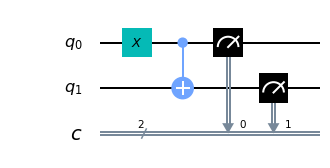

In [5]:
# draw as matplotlib 
circuit.draw(output = "mpl")

### 3. Setting up the account

In [6]:
# The code was removed by Watson Studio for sharing.

In [8]:
from qiskit import IBMQ
# JUST FOR INITIAL SETUP: Connect to IBM Quantum Experience Account
IBMQ.save_account(token)

In [9]:
# Use the following for following notebooks, as the connection should be saved for the future:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

### 4. Execute circuit

In [11]:
# Next get an overview of the quees for different available quantum computer:
provider = IBMQ.get_provider("ibm-q")

# Each p stands for one Quantum Computer.
for backend in provider.backends():
    # One availabe Quantum Computer is only simulated and hence has no set number of qubits
    try:
        n_qubits = len(backend.properties().qubits)
        
    except:
        n_qubits = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {n_qubits} qubits")

ibmq_qasm_simulator has 1 queued and simulated qubits
ibmqx2 has 5 queued and 5 qubits
ibmq_16_melbourne has 9 queued and 15 qubits
ibmq_vigo has 6 queued and 5 qubits
ibmq_ourense has 1 queued and 5 qubits
ibmq_london has 4 queued and 5 qubits
ibmq_burlington has 0 queued and 5 qubits
ibmq_essex has 4 queued and 5 qubits
ibmq_armonk has 0 queued and 1 qubits
ibmq_rome has 6 queued and 5 qubits


In [13]:
from qiskit.tools.monitor import job_monitor

# select backend with minimal length que and sufficient number of qubits
backend = provider.get_backend("ibmq_london")

# Shots equals the number of times the circuit gets run. This is necessary, as quantum computing is based on probability in the end.
# The more shots you take the more certain the cummulative result will be.
job = q.execute(circuit, backend=backend, shots=300)
job_monitor(job)

Job Status: job has successfully run


### 5. Result

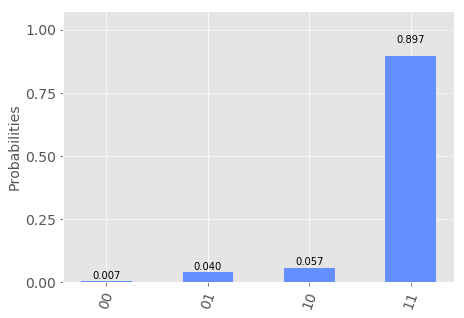

In [16]:
from qiskit.visualization import plot_histogram
from matplotlib import style
style.use("ggplot")

result = job.result()
counts = result.get_counts()

plot_histogram([counts])